# **Comparing Vision LLMs for Agricultural Diagnostics** 
## Identifying Pear Trees and Leaf Diseases
This notebook compares the performance of four state-of-the-art vision LLMs—Llama Vision, Pixtral, ChatGPT Vision, and Qwen Vision—in two agricultural tasks:
1. Identifying a pear tree from an image.
2. Detecting signs of disease on the leaves of the tree.

Each model's predictions will be evaluated for accuracy, speed, and contextual explanations. We aim to understand their suitability for real-world agricultural applications.

------------------------

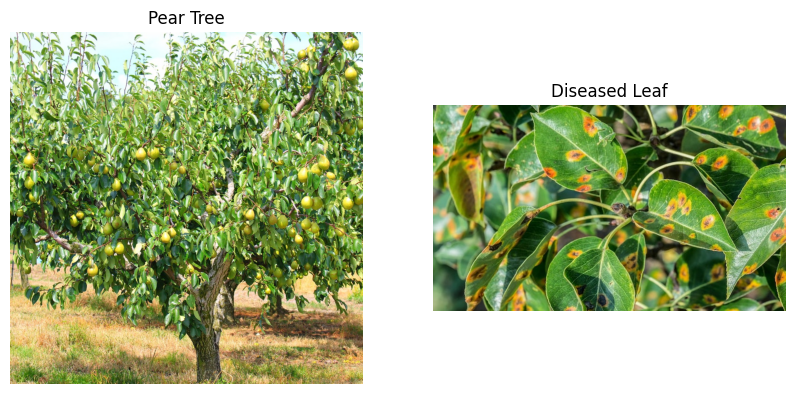

In [1]:
from PIL import Image
from IPython.display import display
import ollama
import matplotlib.pyplot as plt

pear_tree_image_path = "C:/Users/gfrag/Desktop/Multimodal_Testing/images/mature_tree.jpg"
diseased_leaf_image_path = "C:/Users/gfrag/Desktop/Multimodal_Testing/images/pear-leaves-with-rust-damage.jpg"
# Load image of pear tree
pear_tree_image = Image.open(pear_tree_image_path)
diseased_leaf_image = Image.open(diseased_leaf_image_path)
# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(pear_tree_image)
plt.title("Pear Tree")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(diseased_leaf_image)
plt.title("Diseased Leaf")
plt.axis("off")

TREE_PROMPT = """You are an agriculture expert, analyze the provided image and answer the following questions about the tree depicted:

1) Tree Identification: What type of tree is this (e.g., pear tree, apple tree, etc.)?
2) Harvest Information: Based on the tree type and visible fruit maturity, when is the approximate harvest time (in how many weeks)?
3) Health Status: Does the tree show any visible signs of disease or distress (e.g., discoloration, spots, or abnormal growth)?
4) Water Needs: Based on the condition of the leaves, soil, and overall tree health, does this tree appear to need more water, less water, or is it adequately watered?

Please provide a detailed explanation for each answer, referencing visual cues from the image to support your conclusions.
"""

DISEASE_PROMPT = """Analyze the provided image of the tree's leaves and answer the following questions:

1) Disease Identification: Do the leaves show any visible signs of disease (e.g., discoloration, spots, wilting, or deformities)? If yes, what is the name of the disease or likely condition affecting the leaves?
2) Cause of the Disease: What is the likely cause of this disease (e.g., fungal infection, bacterial infection, pest infestation, or nutrient deficiency)?
3) Cure and Prevention: What are the recommended steps to cure this disease and prevent it from recurring (e.g., specific treatments, pesticides, pruning, or changes in watering or nutrient management)?

Please provide a detailed explanation for each response, citing visual evidence from the image to justify your conclusions."""



## Analysis using llama vision

In [2]:
response_tree = ollama.chat(
    model='llama3.2-vision:latest',
    messages=[{
        'role': 'user',
        'content': TREE_PROMPT,
        'images': [pear_tree_image_path]
    }]
)
# print("+Tree analysis:\n",response_tree["message"]["content"])


In [3]:

response_disease = ollama.chat(
    model='llama3.2-vision:latest',
    messages=[{
        'role': 'user',
        'content': DISEASE_PROMPT,
        'images': [diseased_leaf_image_path]
    }]
)

print("+Tree analysis:\n",response_tree["message"]["content"])
print("------------------------------------------------------------------")
print("+Disease analysis:\n",response_disease["message"]["content"])

+Tree analysis:
 **Tree Identification**

Based on the shape of the leaves, which are long and narrow with a pointed tip, and the fruit that is small, round, and yellow-green in color, I conclude that this tree is likely a **pear tree**. The leaves also have a serrated edge, which is consistent with pear trees.

**Harvest Information**

The fruit appears to be mature but not yet overripe, as they are still slightly greenish-yellow in color and firm to the touch. Based on these observations, I estimate that the harvest time for this tree will be approximately **6-8 weeks from now**, assuming a typical growth cycle for pear trees.

**Health Status**

Upon closer inspection of the image, I notice that there are no visible signs of disease or distress on the leaves or fruit. The leaves appear healthy and green, with no discoloration or spotting. Additionally, the fruit is evenly distributed throughout the tree, suggesting good pollination and fertilization. Overall, based on these visual c